In [857]:
import seaborn as sb
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv ('WEO_Data_by_subject.csv')

In [858]:
year_list1=[]
for i in range(1997,2024):#create a list of all the years between 1997 and 2023 both included.
    year_list1.append(i)
area_name_list = df['Country Group Name'].unique()#get the list for all the areas across the world.
area_name_list=area_name_list.tolist()#convert it to a list.
area_name_list.remove('International Monetary Fund, World Economic Outlook Database, October 2022')#Remove International Monetary Fund, World Economic Outlook Database, October 2022 as they have garbage data.
area_name_list = [x for x in area_name_list if str(x) != 'nan']#remove nan element from list.

In [859]:
df=df.drop(['Country/Series-specific Notes'],axis=1)#drop Country/Series-specific Notes from the 
df=df.replace(np.nan,'0')#replace nan values with 0.
for j in range(4,52):#for all the years containing values replace commas. 
    for i in range(len(df)):
        df.iat[i,j] = str(df.iat[i,j]).replace(',',"")#delete the commas in betweeen numbers. 
        df.iat[i,j] =pd.to_numeric(df.iat[i,j])#convert string type back to int.
df[df.columns[5:]]=df[df.columns[5:]].astype(float)#convert elemts from column 5 onwardds to float type.

In [860]:
gdp_data=df.iloc[14:27]#get the data for gdp for all the regions of the world.
gdp_data.drop(gdp_data.iloc[:, 4:21], inplace=True, axis=1)#drop years before 1997 as they contain many empty data entries which are irrelevant. 
gdp_data.drop(gdp_data.iloc[:, 31:36], inplace=True, axis=1)#drop years after 2023 as they contain many empty data entries which are irrelevant.
gdp_data_per=df.iloc[0:13]#get the percent change in gdp for all the regions of the world.
gdp_data_per.drop(gdp_data_per.iloc[:, 4:21], inplace=True, axis=1)#drop years before 1997 as they contain many empty data entries which are irrelevant. 
gdp_data_per.drop(gdp_data_per.iloc[:, 31:36], inplace=True, axis=1)#drop years after 2023 as they contain many empty data entries which are irrelevant.

In [861]:
World_data=pd.read_csv ('WEO_Data.csv')#import a new datset which is just a rearranged form 
World_data=World_data.drop(['Country/Series-specific Notes'],axis=1)
World_data=World_data.replace(np.nan,'0')#replace nan values with 0.
for j in range(4,52):#for all the years containing values replace commas.
    for i in range(len(df)):
        World_data.iat[i,j] = str(World_data.iat[i,j]).replace(',',"")#delete the commas in betweeen numbers. 
        World_data.iat[i,j] =pd.to_numeric(World_data.iat[i,j])#convert string type back to int.
World_data[World_data.columns[5:]]=World_data[World_data.columns[5:]].astype(float)

In [862]:
data=pd.DataFrame()#create a dataframe.
country = World_data.loc[World_data['Country Group Name'] == 'World']#in this dataframe add all elements who have World as their country group name.
data = pd.concat([data , country])

In [863]:
World_data
subj_list=[]
for i in range(0,14):
    subj_list.append(World_data.iat[i,1])#create a subject list relating to all the important factors of gdp.

In [864]:
data=World_data.iloc[0:14:,]#in the dataset World_data derive all the subjects for world which impact gdp like 'Gross domestic product, constant prices', 'Gross domestic product, constant prices', 'Gross domestic product, current prices'etc.
data.drop(World_data.iloc[:, 4:21], inplace=True, axis=1)#remove some columns as done on the main dataset earlier.
data.drop(World_data.iloc[:, 31:36], inplace=True, axis=1)

In [865]:
data.drop(['Country Group Name'],axis=1,inplace=True)#The data had all the columns as object type so in order to draw a correlation matrix we convert them to float type.
data.drop(['Subject Descriptor'],axis=1,inplace=True)#Thus we remove all string elemnets and convert all numbers to float type.
data.drop(['Units'],axis=1,inplace=True)
data.drop(['Scale'],axis=1,inplace=True)

In [866]:
data=data.T#Take the transpose of the dataset for the correlation matrix.

## Heatmap

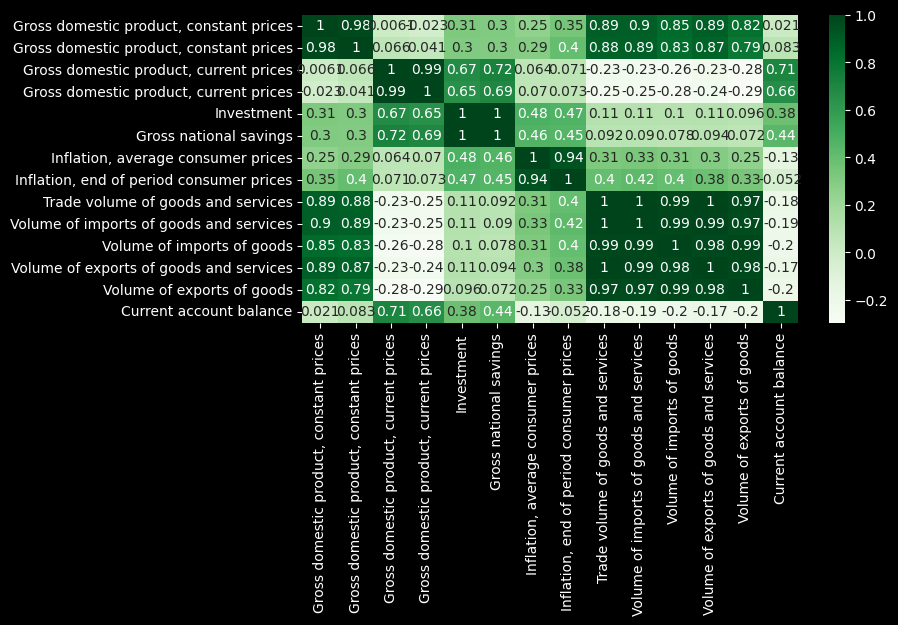

In [899]:
#we now draw the color coded correlatoin matrix
corrMatrix = data.corr() 
fig, ax = plt.subplots(figsize=(8,4))
sb.heatmap(corrMatrix, annot=True, xticklabels=subj_list, yticklabels=subj_list,cmap="Greens") # Show absolute value
plt.show()

#### Conclusion: From the above matrix we can see that GDP on constant prices(Percent Change) is highly correlated with volume of import and export for goods and services.Whereas GDP in current prices is negatively correlated with volume of imports and exports so we plot both of the graphs. 

In [870]:
# for area in area_name_list:
#     data=pd.DataFrame()
#     country = World_data.loc[World_data['Country Group Name'] == area]
#     data = pd.concat([data , country])
#     data.drop(['Country Group Name'],axis=1,inplace=True)
#     data=data.T
#     data.astype(float)
#     #we now draw the color coded correlatoin matrix
#     corrMatrix = data.corr() 
#     fig, ax = plt.subplots(figsize=(10,8))
#     sb.heatmap(corrMatrix, annot=False, xticklabels=subj_list, yticklabels=subj_list,cmap="Greens") # Show absolute value
#     plt.show()

In [871]:
world_gdp=[]
for i in range(4,gdp_data.shape[1]):
    world_gdp.append(gdp_data.iat[0,i])#create a list containing info on world gdp across all the years 1997 to 2023. 
world_gdp_per=[]
for i in range(4,gdp_data_per.shape[1]):
    world_gdp_per.append(gdp_data_per.iat[0,i])#create a list containing info on world gdp percent change across all the years 1997 to 2023.

## World GDP

In [872]:
fig=px.line(x=year_list1,y=world_gdp)#plot the world gdp from 1997 to 2022
fig.show()

#### Conclusion:We can see the GDp of the world from 1997 we can see a significant dip in 2009 due to recession faced by USA,in 2016 due to Brexit Referendum and also in 2020 due to covid-19. 

## Absolute and Percent Change of GDP of different regions across the world.

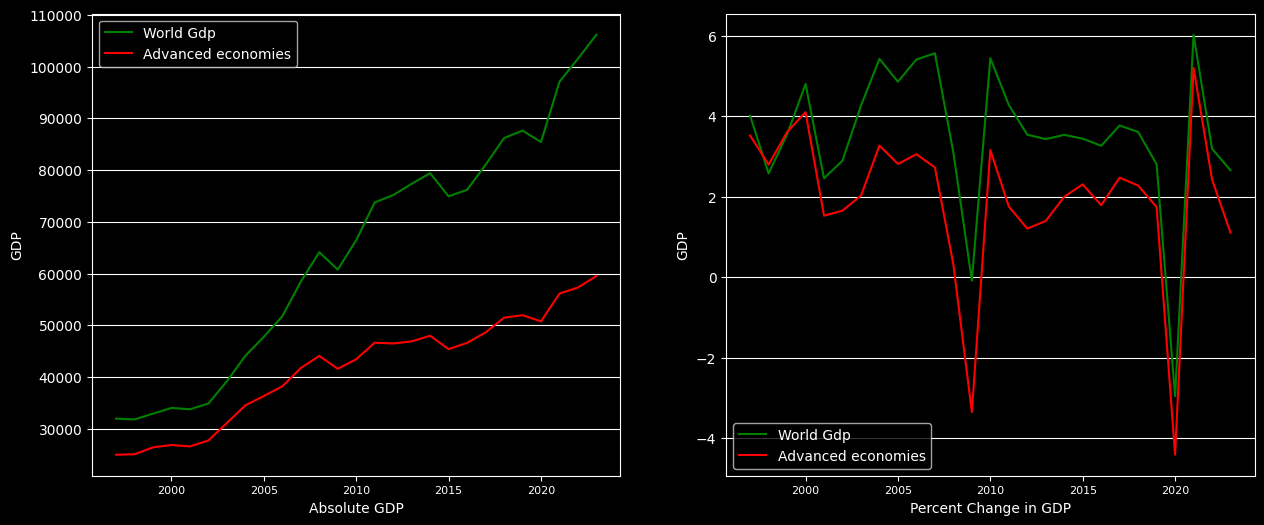

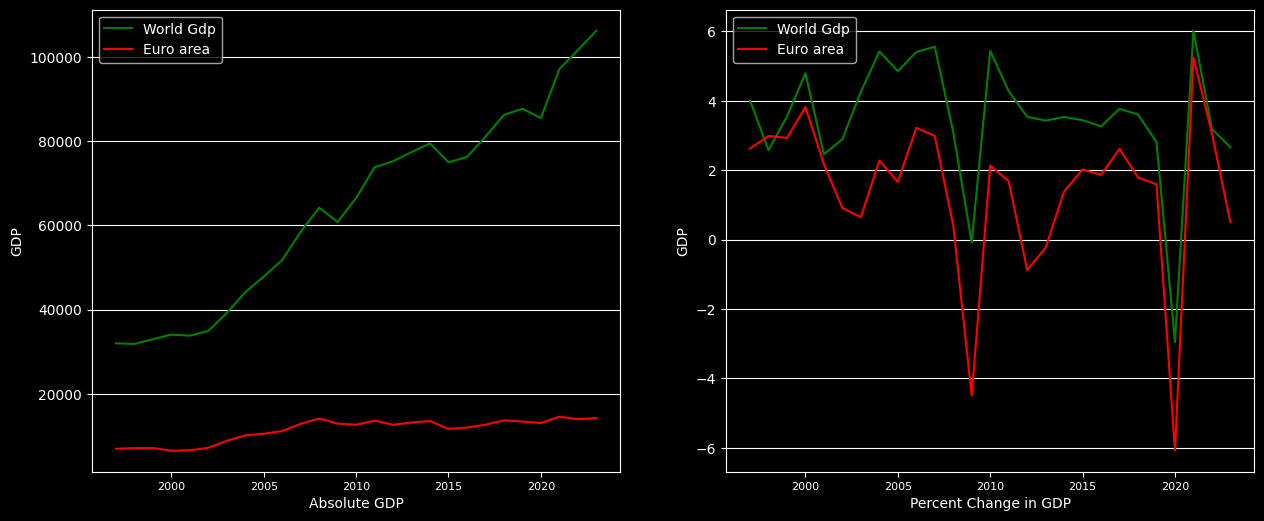

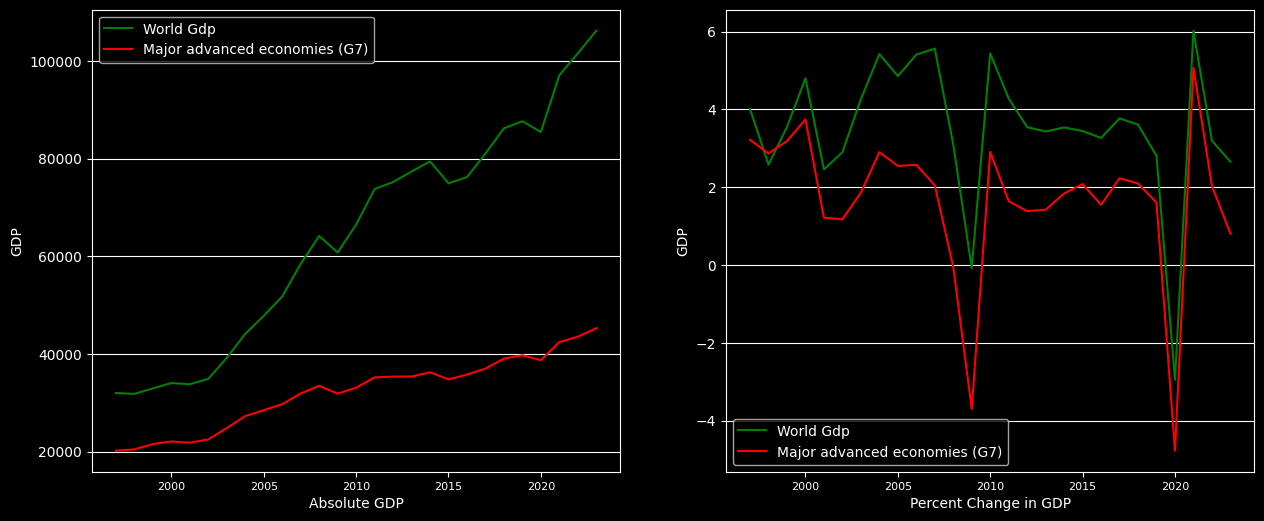

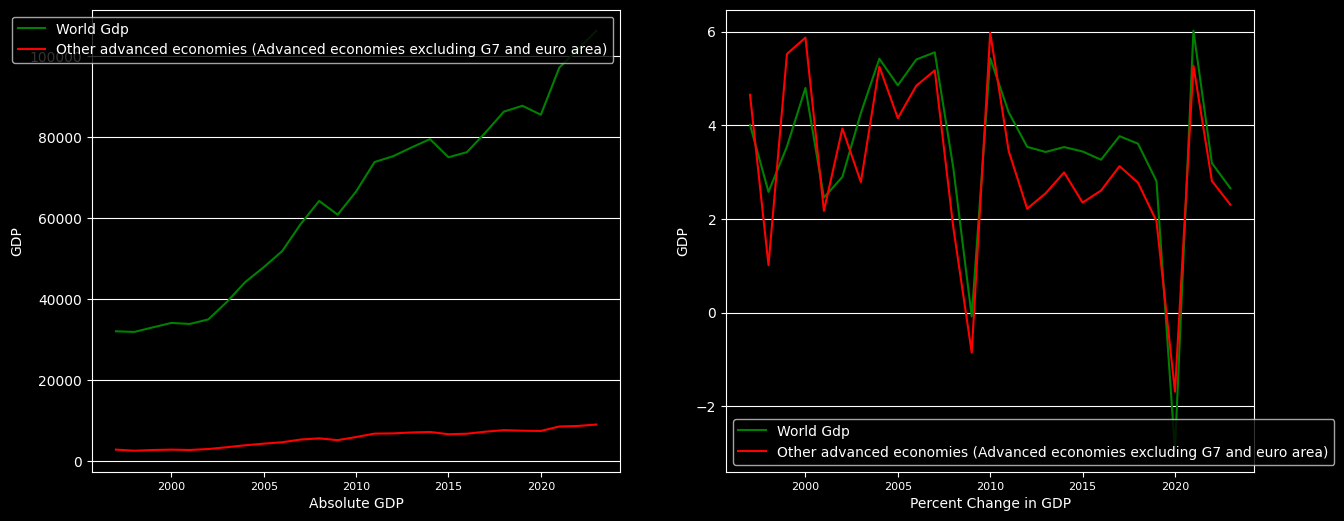

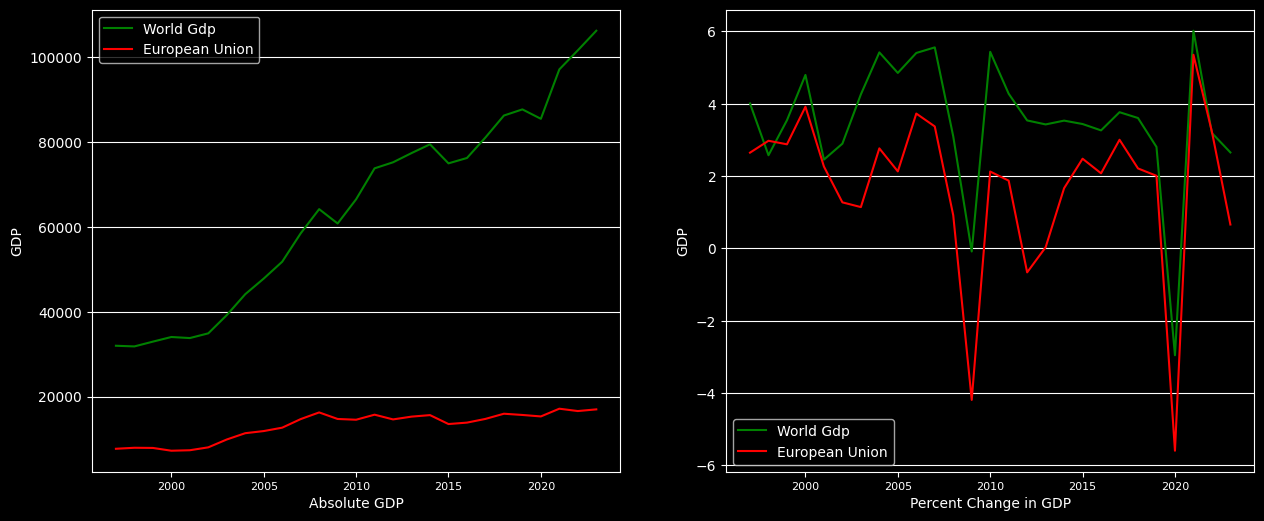

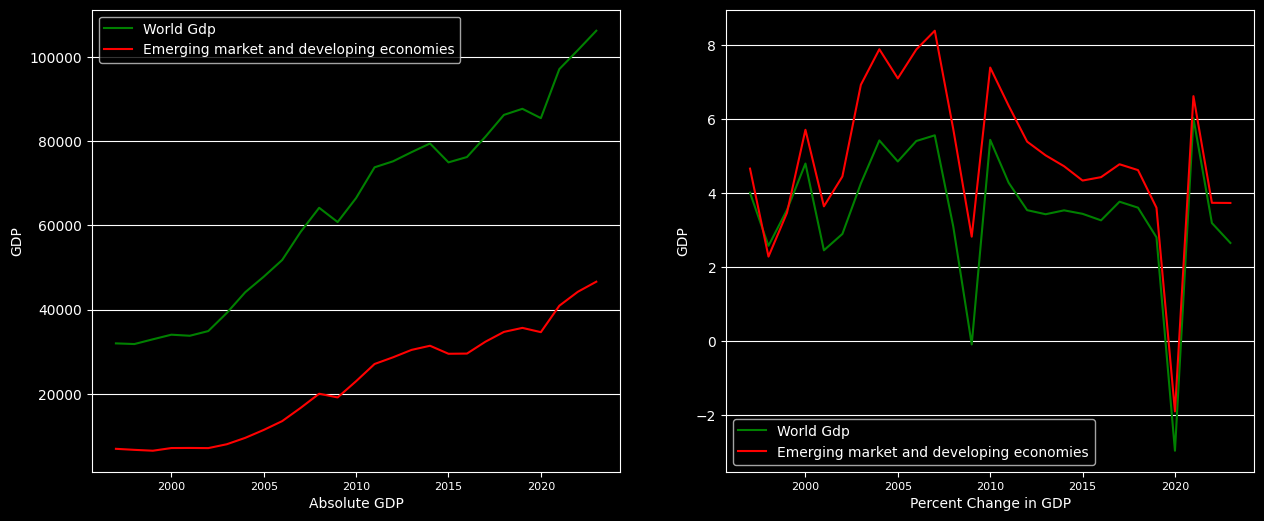

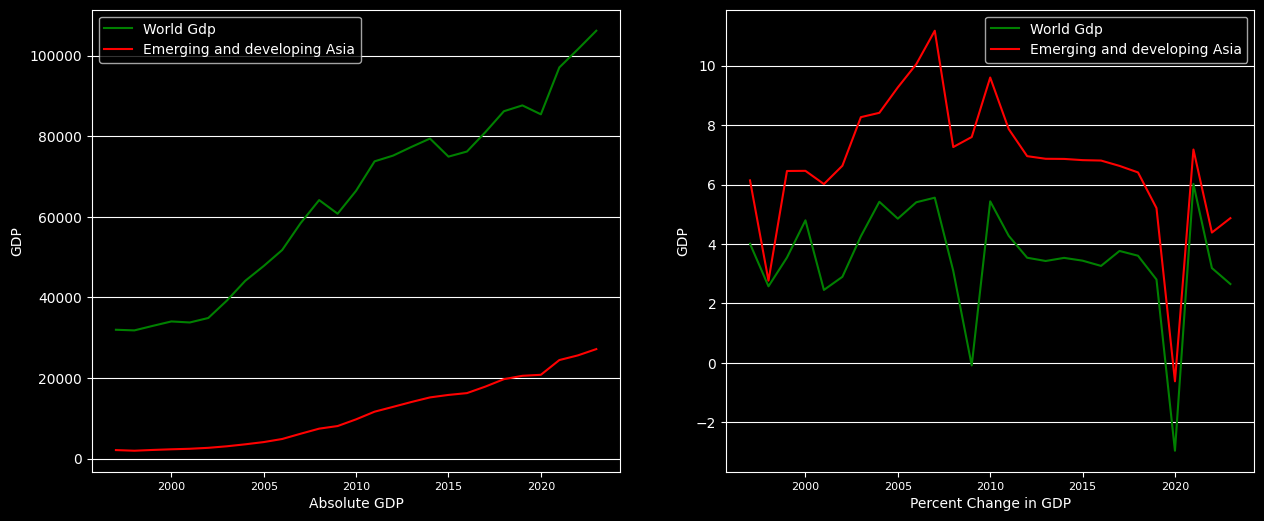

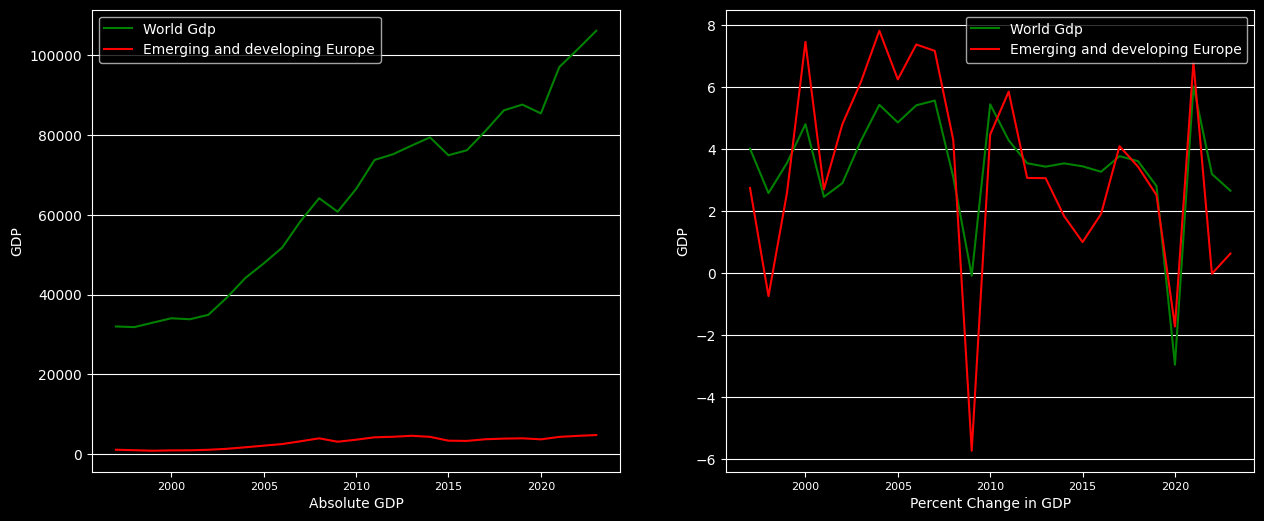

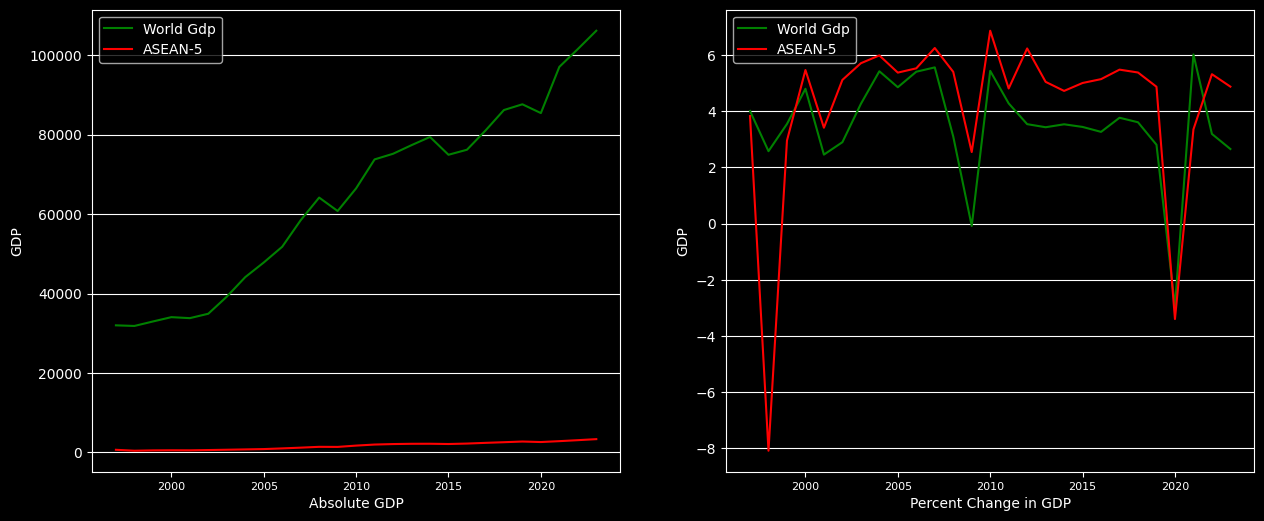

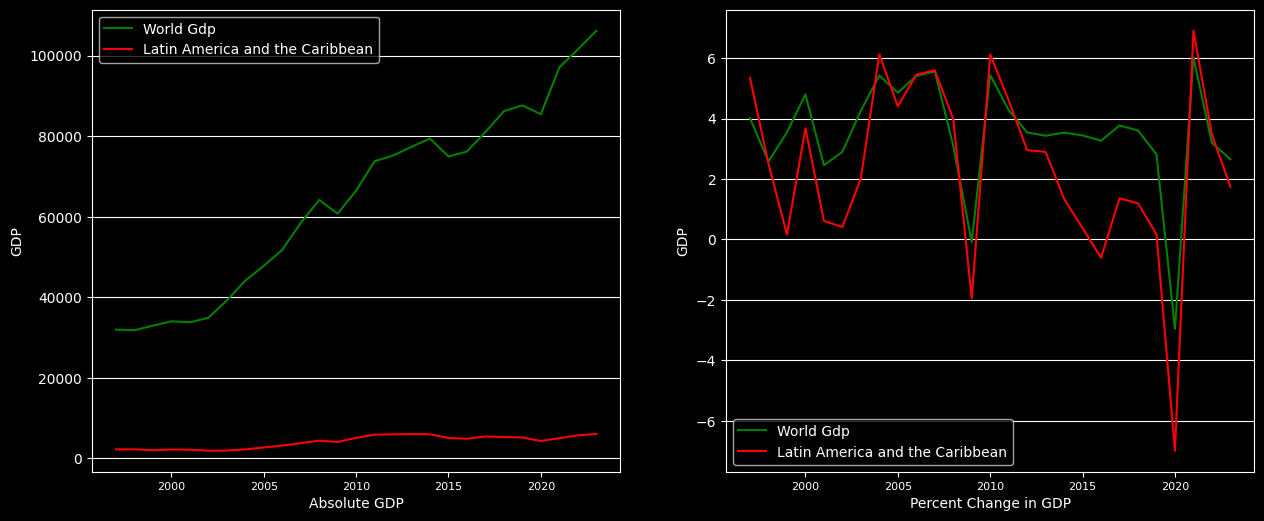

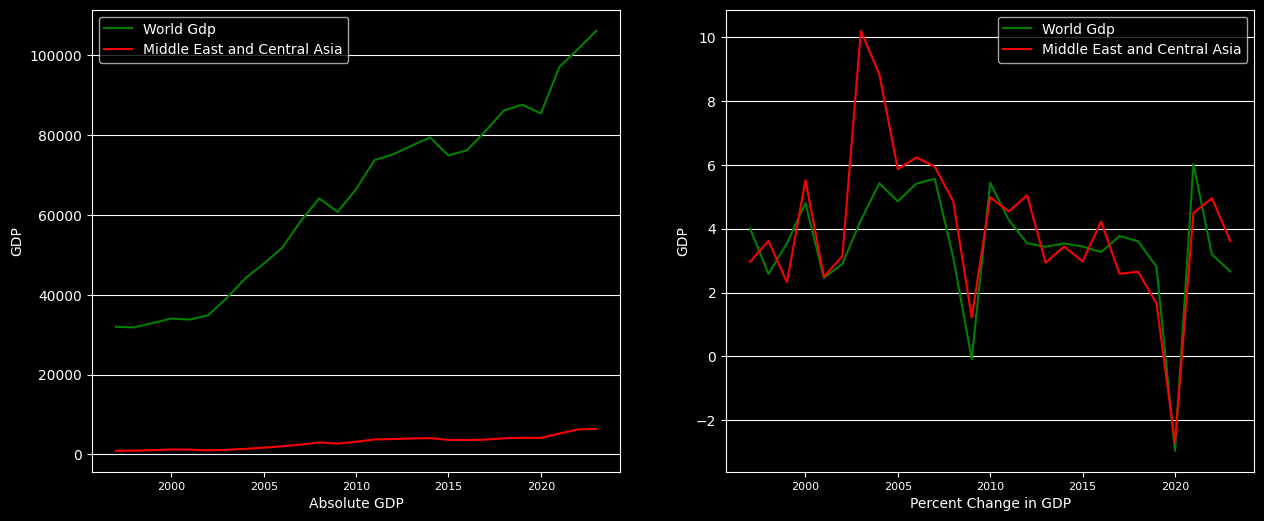

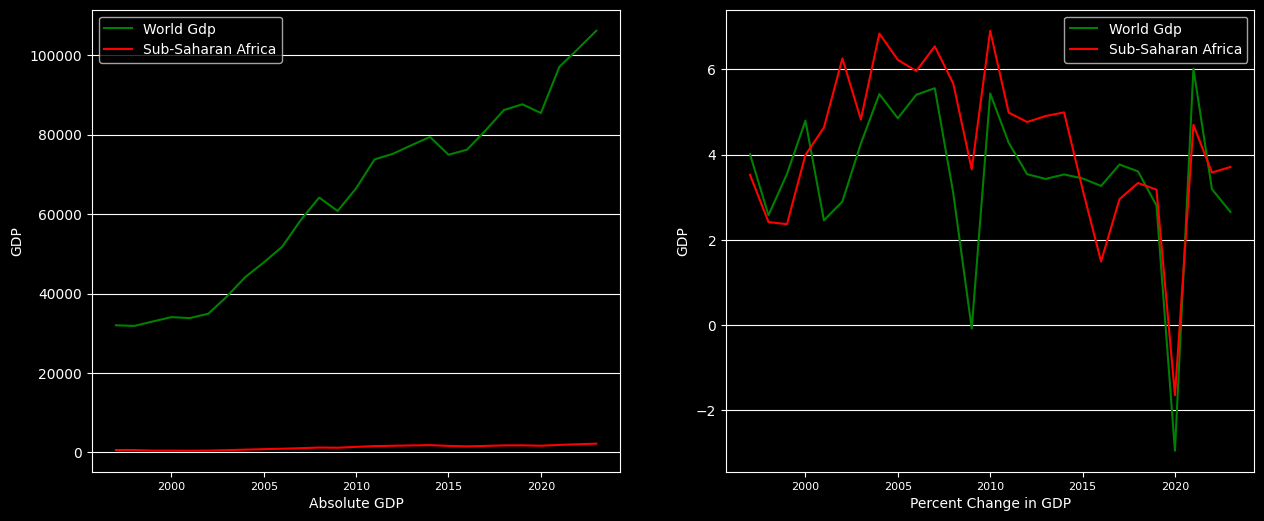

In [873]:
import seaborn as sb
for i in range(1,13):
    area_gdp=[]
    area_gdp_per=[]
    for j in range(4,gdp_data.shape[1]):
        area_gdp.append(gdp_data.iat[i,j])
    for j in range(4,gdp_data_per.shape[1]):
        area_gdp_per.append(gdp_data_per.iat[i,j])
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(year_list1,world_gdp,color='g',label='World Gdp')
    plt.plot(year_list1,area_gdp,label=area_name_list[i],color='r')
    plt.legend()
    plt.grid(axis='y')
    plt.xlabel('Absolute GDP')
    plt.ylabel('GDP')
    plt.tick_params(axis='x',labelsize=8)
    plt.subplot(1,2,2)
    plt.plot(year_list1,world_gdp_per,color='g',label='World Gdp')
    plt.plot(year_list1,area_gdp_per,label=area_name_list[i],color='r')    
    plt.legend()
    plt.grid(axis='y')
    plt.xlabel('Percent Change in GDP')
    plt.ylabel('GDP')
    plt.tick_params(axis='x',labelsize=8)
    plt.show()

#### Conclusion

In [874]:
gdp_data1=gdp_data[['Country Group Name','Subject Descriptor','Units','Scale','1997','2000','2003','2006','2009','2012','2015','2018','2021']]

## Boxplot Showing GDP(Current prices) for different regions of the world

In [875]:
for i in range(1,13):
    area_gdp=[]
    area_gdp_per=[]
    for j in range(4,gdp_data.shape[1]):
        area_gdp.append(gdp_data.iat[i,j])
    fig=px.box(area_gdp,title='GDP for ' + str(area_name_list[i]))
    fig.show()


### Conclusion:We can clearly see the differnce between min,max,mean,25 and 75 quantile GDP for all the regions and how G7 and developing countries 

In [876]:
year_list2=['1997','2000','2003','2006','2009','2012','2015','2018','2021']#create a list containing important years in between 1997 to 2015 to show overall change.
area_name_list_ww=[]#create a new list which contains area names except world as we have to plot import and export there is no meaning to plot them for world.
area_name_list_ww = df['Country Group Name'].unique()
area_name_list_ww=area_name_list_ww.tolist()
area_name_list_ww.remove('International Monetary Fund, World Economic Outlook Database, October 2022')
area_name_list_ww.remove('0')
#area_name_list_ww = [x for x in area_name_list_ww if str(x) != 'nan']
area_name_list_ww.remove('World')
area_name_list_ww.remove('Advanced economies')#The dataset did not have export and import info regarding all the below mentioned regions so we remove them.
area_name_list_ww.remove('Euro area')
area_name_list_ww.remove('European Union')
area_name_list_ww.remove('ASEAN-5')

In [877]:
exp_data=df.iloc[316:324]#get export data from the dataset
exp_data=exp_data.drop(['Estimates Start After'],axis=1)#remove the last column as it is irrelevant.
exp_data.drop(exp_data.iloc[:, 4:21], inplace=True, axis=1)#perform similar eda as done before to remove irrelevant columns.
exp_data.drop(exp_data.iloc[:, 31:35], inplace=True, axis=1)

In [878]:
exp_data1=exp_data[['Country Group Name','Subject Descriptor','Units','Scale','1997','2000','2003','2006','2009','2012','2015','2018','2021']]#create a new dataset to contain info about some of the listed years.

## Exports from 1997 to 2021

In [918]:
i=4
for year in year_list2:#for each year draw a pie plot depicting percent contribution of each region from exports
    n_export_yr=[]#list to add number of exports in a year.
    i+=1
    for j in range(len(exp_data1)):
        n_export_yr.append(exp_data1.iat[j,i-1]) 
    fig=px.pie(values = n_export_yr, names = area_name_list_ww)
    fig.show()

### Conclusion

## Imports from 1997 to 2021

In [880]:
imp_data=df.iloc[306:314]#extract import data from the whole daatset
imp_data=imp_data.drop(['Estimates Start After'],axis=1)#perform requiered EDA as done before.
imp_data.drop(imp_data.iloc[:, 4:21], inplace=True, axis=1)
imp_data.drop(imp_data.iloc[:, 31:35], inplace=True, axis=1)

In [881]:
imp_data1=imp_data[['Country Group Name','Subject Descriptor','Units','Scale','1997','2000','2003','2006','2009','2012','2015','2018','2021']]

In [919]:
i=4
for year in year_list2:#for each year draw a pie plot depicting percent contribution of each region from imports.
    n_import_yr=[]#list to add number of imports in a year.
    i+=1
    for j in range(len(imp_data1)):
        n_import_yr.append(imp_data1.iat[j,i-1])    
    fig = plt.figure(figsize =(10, 7))
    fig=px.pie(values = n_import_yr, names = area_name_list_ww)
    fig.show()

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

### Conclusion

## Net Export from 1997 onwards(bar plot)

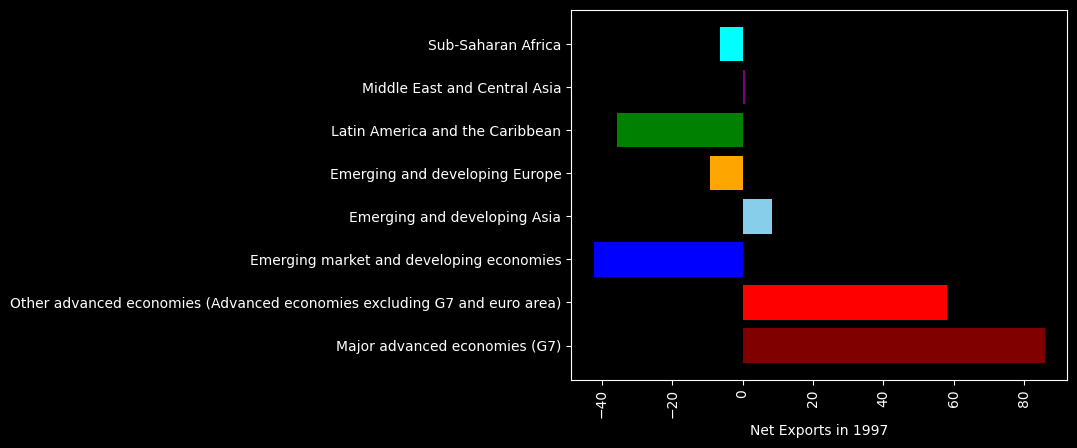

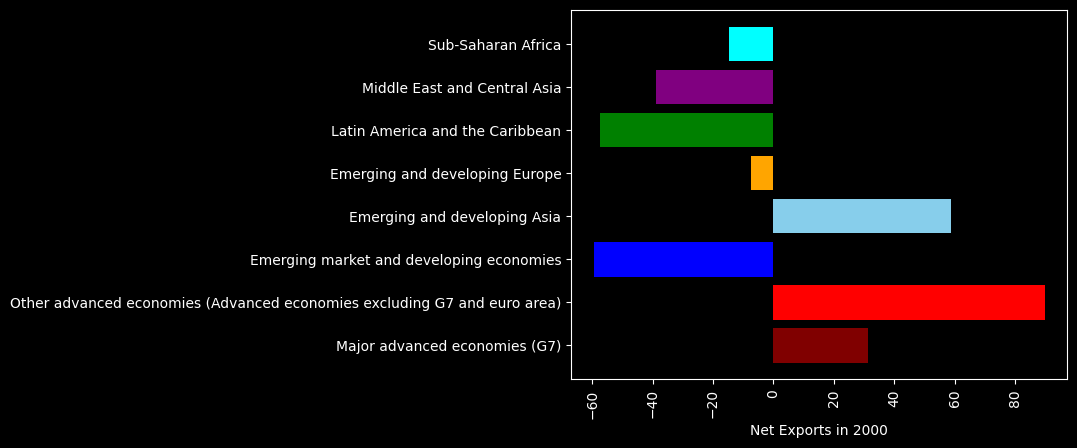

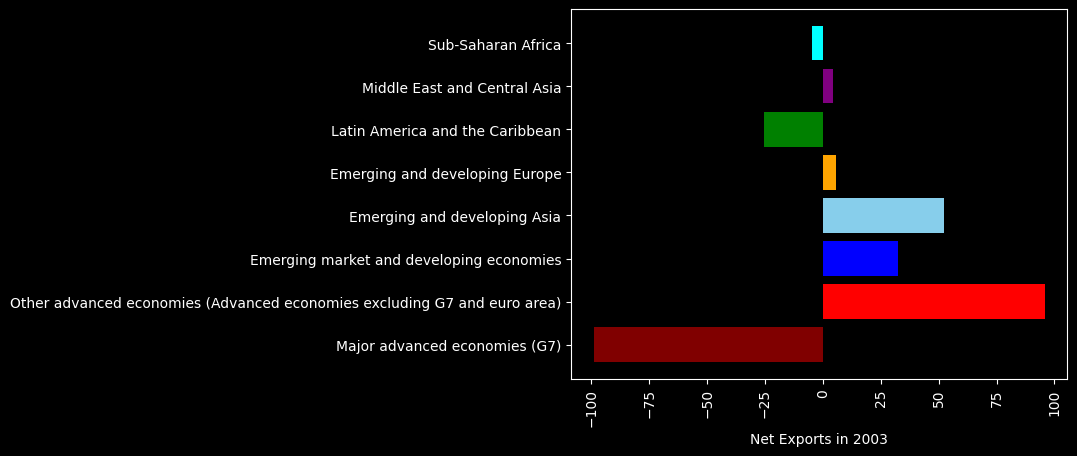

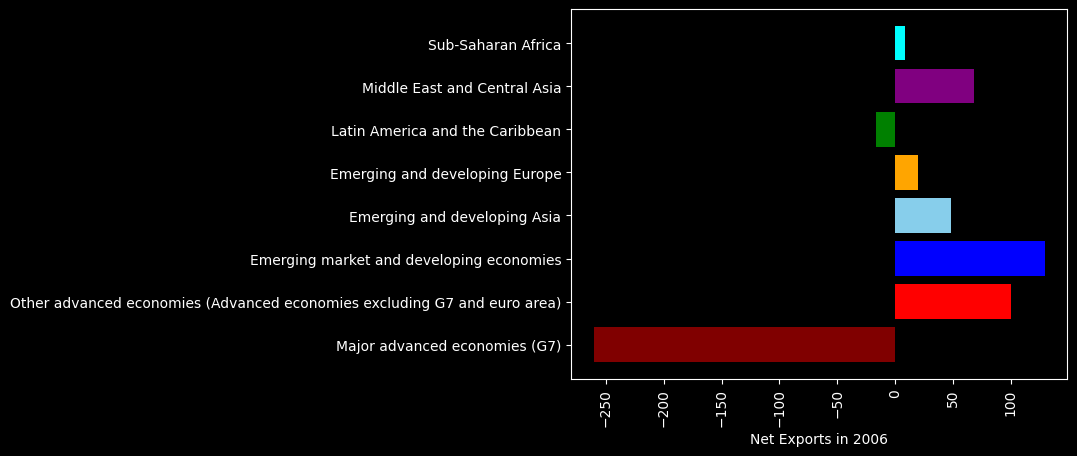

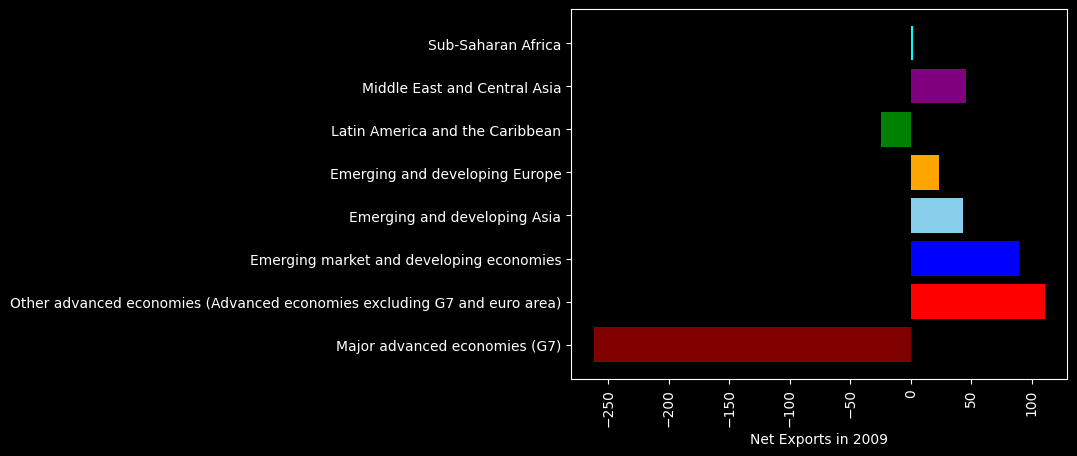

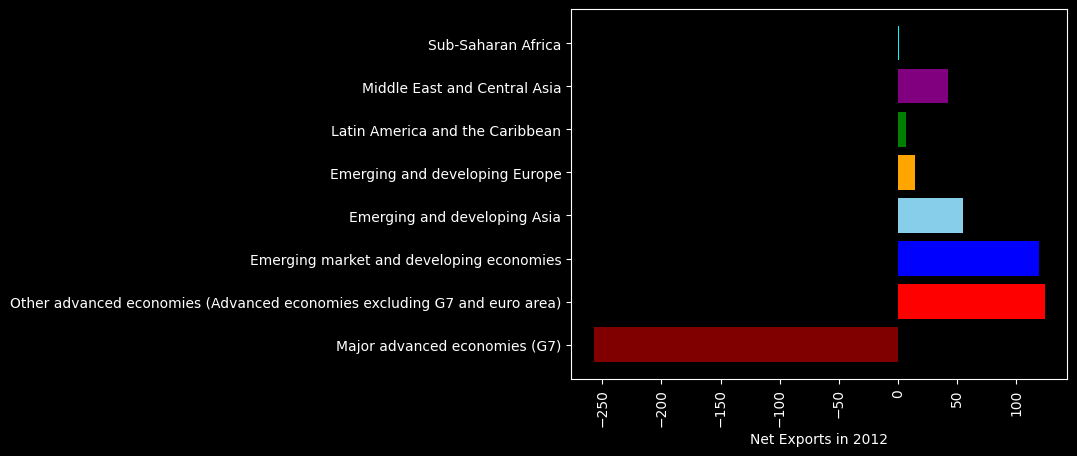

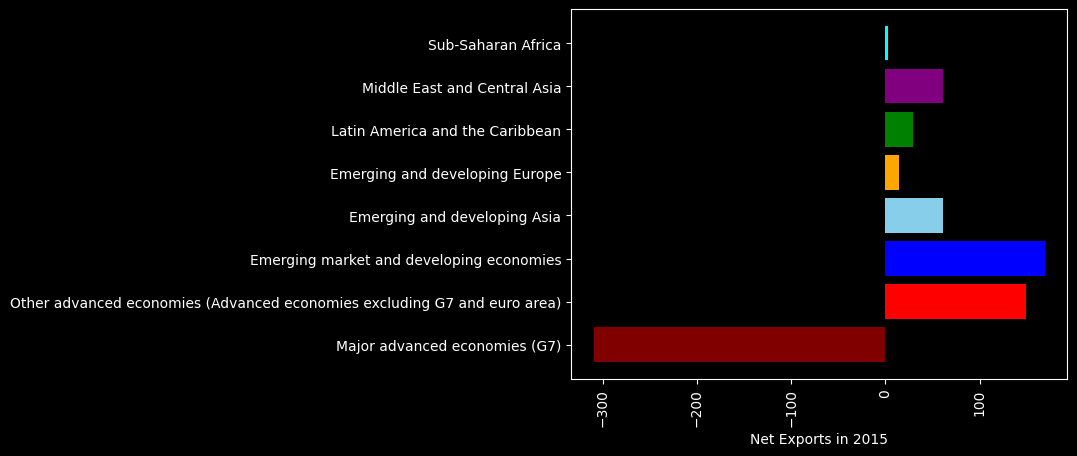

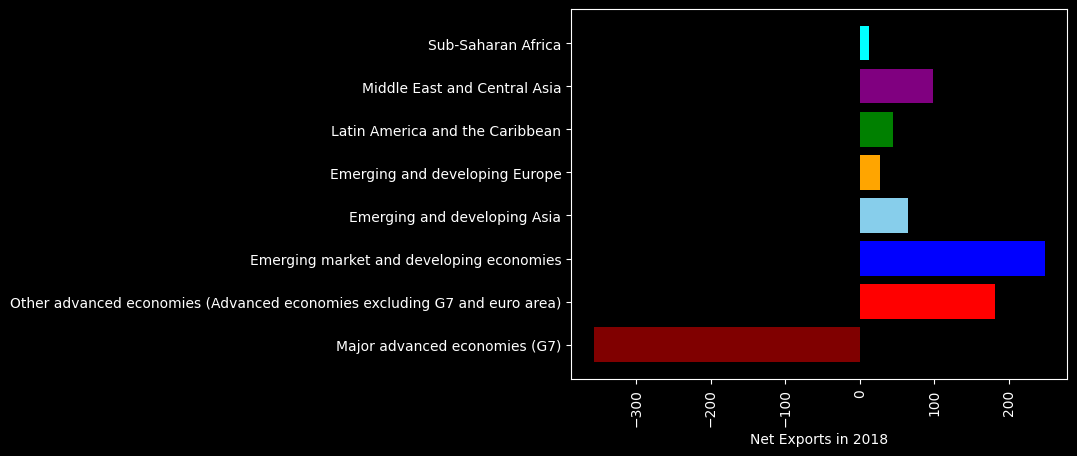

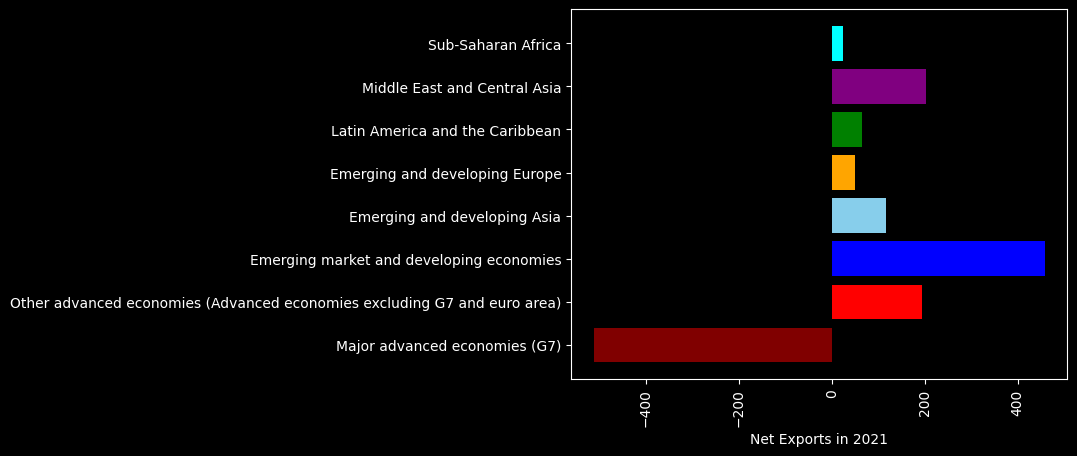

In [883]:
#this plot shows the horizontal bar plot for groups for each year i.e. comparison between all groups year by year
i=4
for year in year_list2:#Here we calculate the net export i.e. export-import for each group for years from 1997 to 2022. 
    n_import_yr=[]
    n_export_yr=[]
    n_exp_imp=[]
    i+=1
    for j in range(len(imp_data)):
        n_import_yr.append(imp_data.iat[j,i-1]) 
    for j in range(len(exp_data)):
        n_export_yr.append(exp_data.iat[j,i-1])
    ne=np.array(n_export_yr)#convert exports and imports as array
    ni=np.array(n_import_yr)
    subtracted_array = np.subtract(ne, ni)#subtract the exports and imports as an array
    n_exp_imp = list(subtracted_array)#convert the array back to a list              
    plt.barh(area_name_list_ww,n_exp_imp,color=['maroon', 'red', 'blue', 'skyblue', 'orange' , 'green','purple','cyan'])
    plt.xticks(rotation=90)
    plt.xlabel("Net Exports in "+str(year))
    plt.show()

### Conclusion

### Net Export by different regions from 1997 onwards(line plot)

In [884]:
#This plot shows the export-import between for each region and not the comparison in between different countries. 
for j in range(len(area_name_list_ww)):#Here we calculate the net export i.e. export-import for each group for years from 1997 to 2022. 
    l1=[]
    l2=[]
    net_exp=[]  
    for i in range(4,imp_data.shape[1]):
        l1.append(imp_data.iat[j,i])
    for i in range(4,exp_data.shape[1]):
        l2.append(exp_data.iat[j,i])
    ne1=np.array(l2)
    ni1=np.array(l1)
    subtracted_array = np.subtract(ne1, ni1)#subtract the exports and imports as an array
    net_exp = list(subtracted_array)#convert the array back to a list
    fig=px.line(x=year_list1,y=net_exp,title="Net Exports by "+str(area_name_list_ww[j]))
    fig.show()
    

### Conclusion

In [903]:
covid_data=pd.read_csv ('WHO-COVID-19-global-data.csv')
#Data of differnet countries on covid 19. 

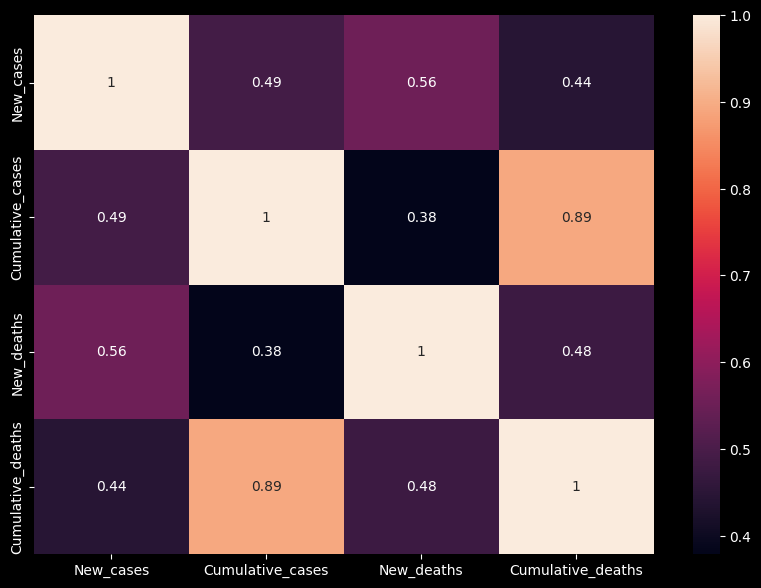

In [904]:
#we now draw the color coded correlatoin matrix
corrMatrix = covid_data.corr() 
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(abs(corrMatrix), annot=True) # Show absolute value
plt.show()

### Conclusion

In [905]:
imp_con=pd.DataFrame()#create a new data frame.
con_list=['Italy','United States of America','India','The United Kingdom','Russian Federation','Brazil','Japan']#list of countries which were deeply affected by covid 19 and some of the big economies. 
for countries in con_list:#China was not included in the list as the data did not have IDX GDP data.
    country =  covid_data.loc[covid_data['Country'] == countries]
    imp_con = pd.concat([imp_con , country])#add the data of all the countries in the dataframe.

In [906]:
gdp_covid_data=pd.read_csv ('DP_LIVE_26112022115746542.csv')# dataset containing the info about quaterly change of GDP.
gdp_covid_data.drop(['Flag Codes'],axis=1,inplace=True)#Drop the irrelevant column.

In [907]:
Qterly_gdp=pd.DataFrame()
con_code=['ITA','USA','IND','GBR','RUS','BRA','JPN']#list of countries which were deeply affected by covid 19 and some of the big economies,this dataset had their codes as the name so we had to make a separate list.
for countries in con_code:
    country = gdp_covid_data.loc[gdp_covid_data['LOCATION'] == countries]#only consider those columns whi have countries as their element in LOCATION column.
    Qterly_gdp = pd.concat([Qterly_gdp , country])#add the data of all the countries in the dataframe.

In [908]:
Qterly_gdp_2019=pd.DataFrame()
time=['2019-Q4','2020-Q1','2020-Q2','2020-Q3','2020-Q4','2021-Q1','2021-Q2','2021-Q3','2021-Q4','2022-Q1','2022-Q2','2022-Q3']#Since we need only covid data so we filter out GDP for that time only.
for t in time:
    country = Qterly_gdp.loc[Qterly_gdp['TIME'] == t]
    Qterly_gdp_2019 = pd.concat([Qterly_gdp_2019 , country])#add the data of all the countries in the dataframe.

In [910]:
Qterly_gdp_IDX=pd.DataFrame()
country = Qterly_gdp_2019.loc[Qterly_gdp_2019['MEASURE'] == 'IDX']#We take only the IDX measure of GDP as it is the most relevant among all givem here.
Qterly_gdp_IDX = pd.concat([Qterly_gdp_IDX , country])
Qterly_gdp_2019=Qterly_gdp_IDX

In [911]:
# Qterly_gdp_2019
# for countries in con_code:
#     Qterly_gdp_con=pd.DataFrame()
#     country = Qterly_gdp_IDX.loc[Qterly_gdp_IDX['LOCATION'] == countries]
#     Qterly_gdp_con = pd.concat([Qterly_gdp_con , country])
#     list1=[]
    

In [912]:
y2=[]#create a list for the number of days passed since covid 19 in the dataset given i.e 1058 days
for j in range(0,1058):
    y2.append(j)

## Quaterly GDP of the countries plotted along with number of cases and new deaths per day

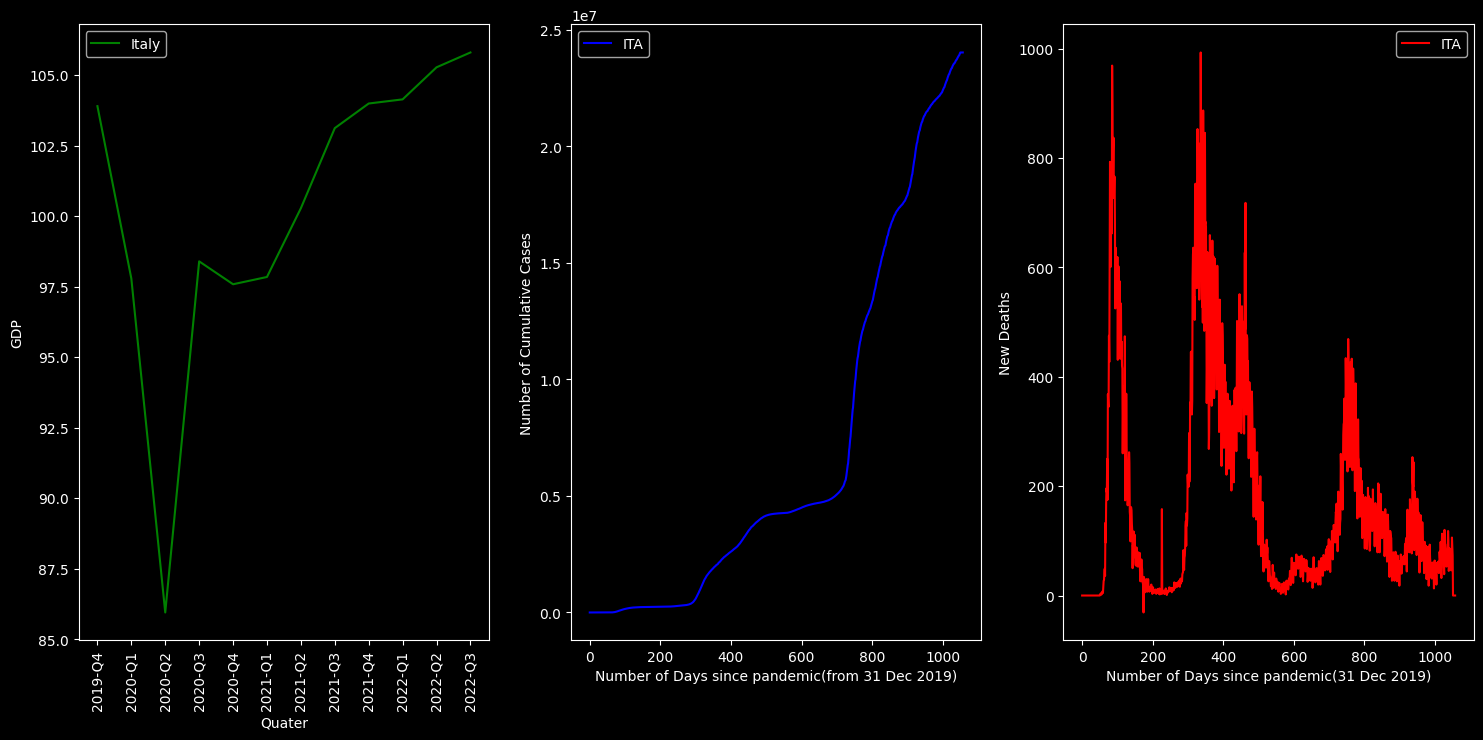

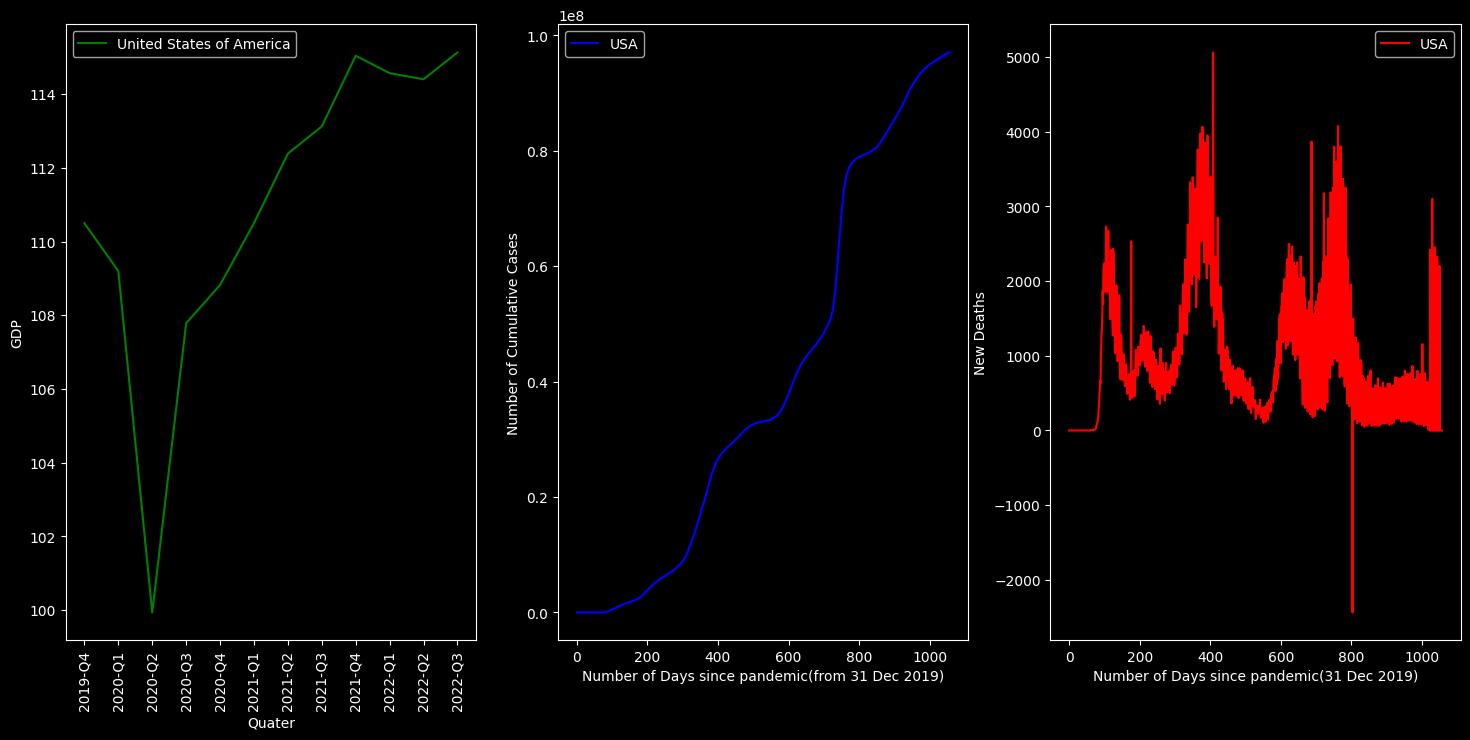

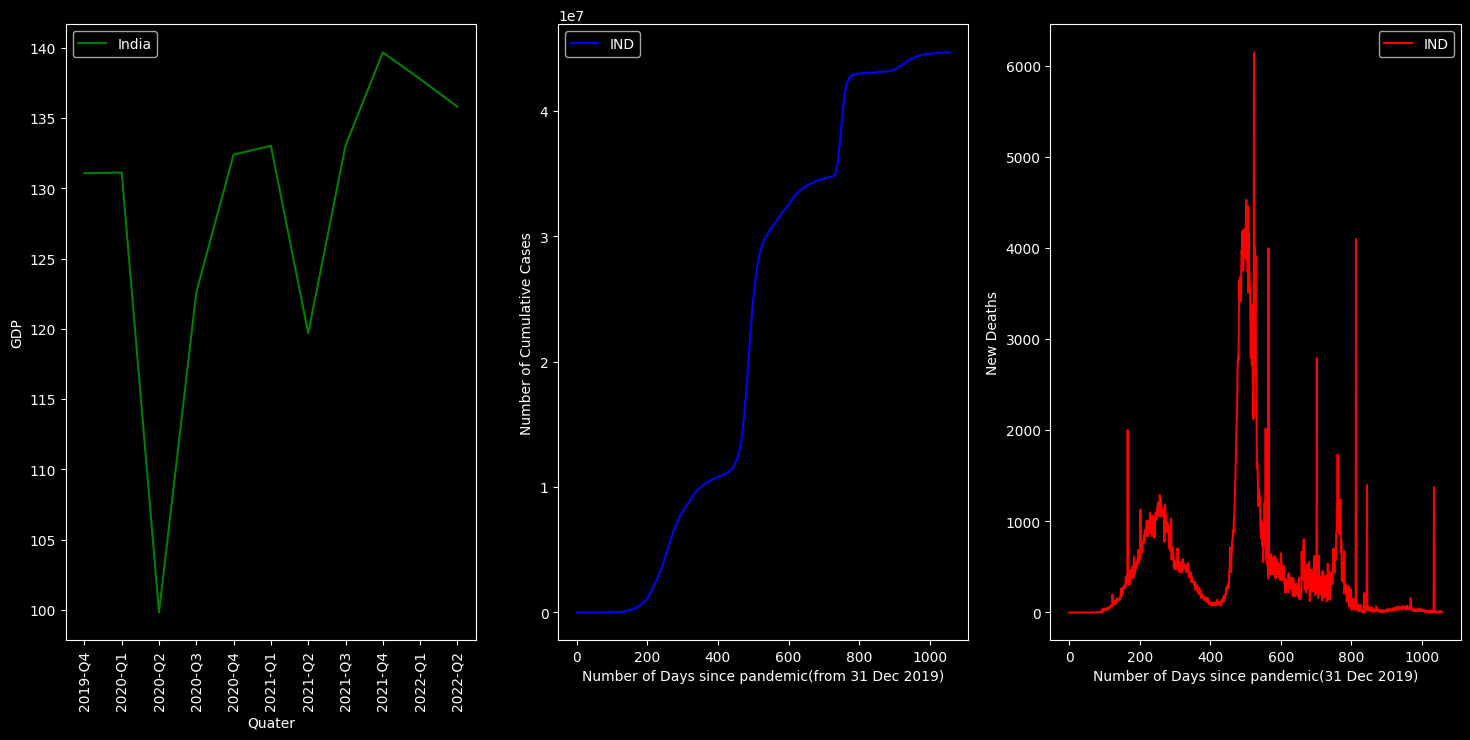

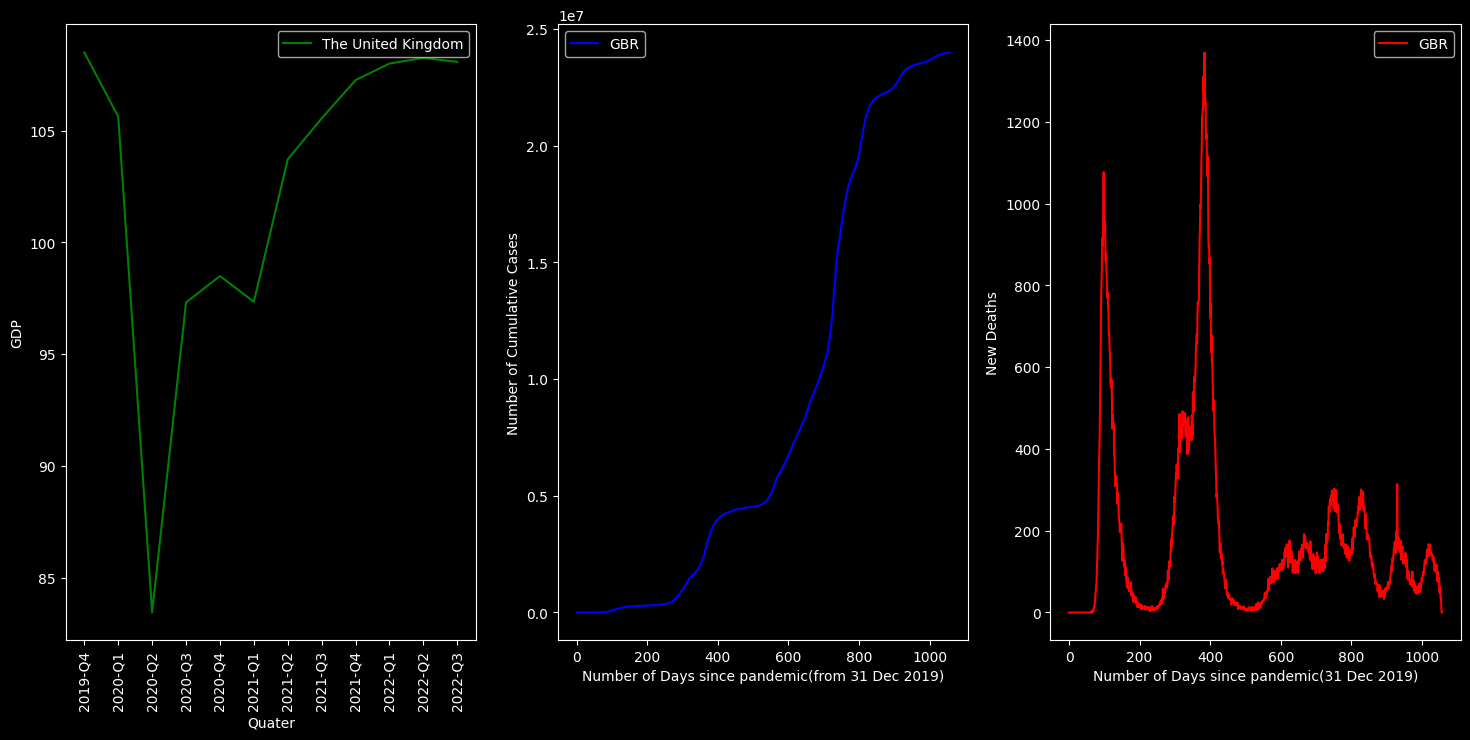

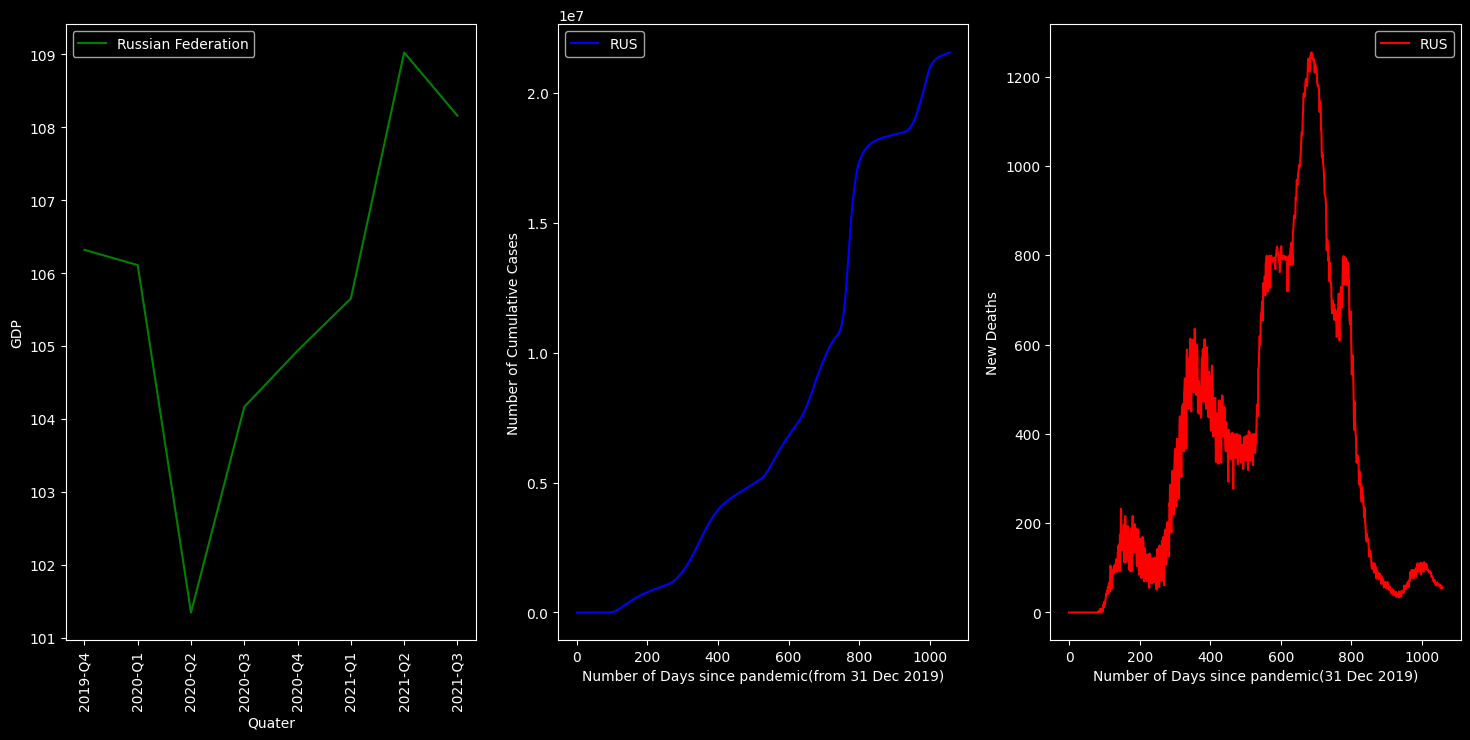

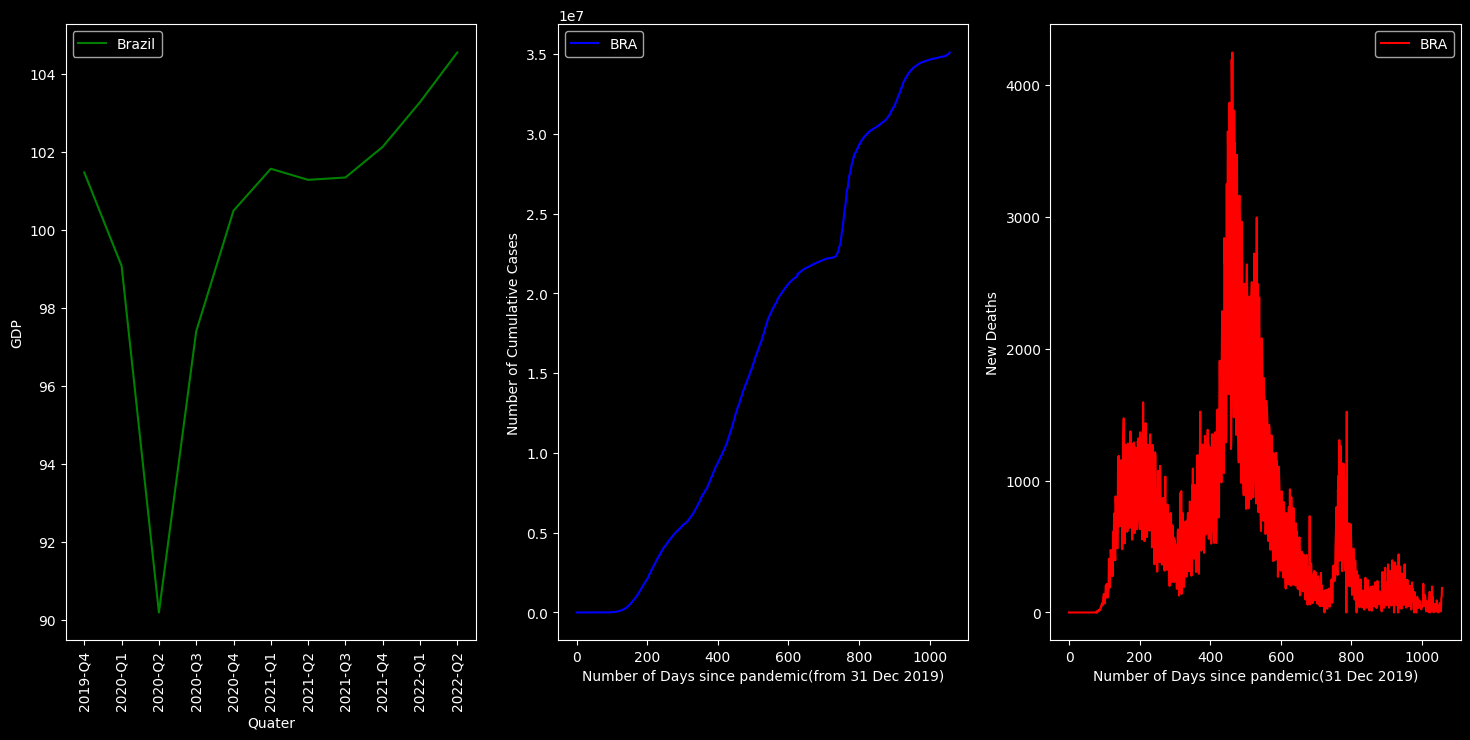

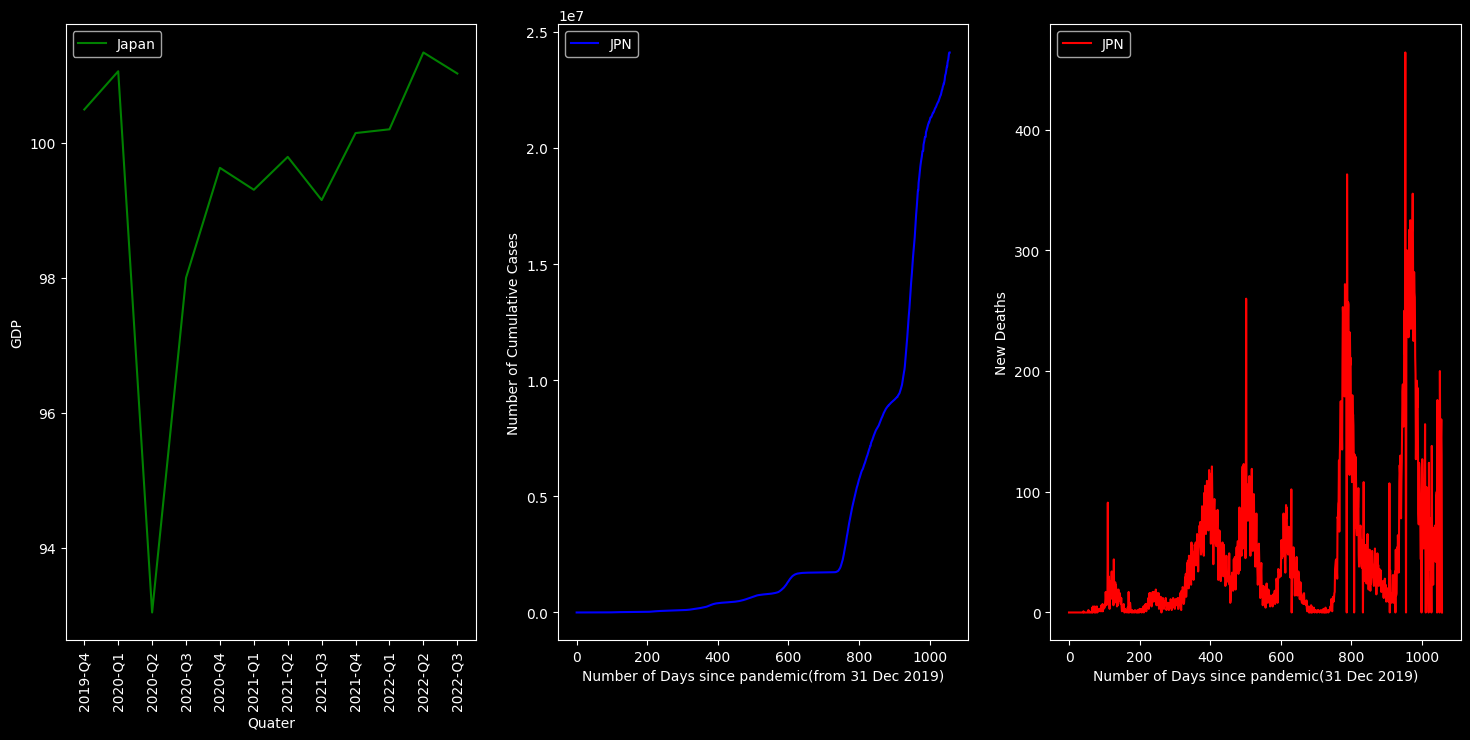

In [913]:
for i in range(len(con_list)):#for all the countries in the con_list we iterate along the loop.
    covid_con=pd.DataFrame()#create a new dataframe
    c=imp_con.loc[imp_con['Country']==con_list[i]]#temp dataframe with con_list[i] as Country.
    covid_con=pd.concat([covid_con,c])
    Qterly_gdp_con=pd.DataFrame()#create a new dataframe
    country = Qterly_gdp_IDX.loc[Qterly_gdp_IDX['LOCATION'] == con_code[i]]#temp dataframe with con_code[i] as LOCATION.
    Qterly_gdp_con = pd.concat([Qterly_gdp_con , country])
    x=Qterly_gdp_con.iloc[:,5]
    y=Qterly_gdp_con.iloc[:,6]
    x1=covid_con.iloc[:,5]
    x2=covid_con.iloc[:,6]
    fig, ax = plt.subplots(1, 3, figsize=(18,8))#Draw a subplot 
    plt.subplot(1,3,1)
    plt.plot(x,y,label=con_list[i],color='g')
    plt.legend()
    plt.xlabel('Quater')
    plt.ylabel('GDP')
    plt.xticks(rotation=90)
    plt.subplot(1,3,2)
    plt.plot(y2,x1,label=con_code[i],color='b')
    plt.legend()
    plt.xlabel('Number of Days since pandemic(from 31 Dec 2019)')
    plt.ylabel('Number of Cumulative Cases')
    plt.subplot(1,3,3)
    plt.plot(y2,x2,label=con_code[i],color='r')
    plt.xlabel('Number of Days since pandemic(31 Dec 2019)')
    plt.ylabel('New Deaths')
    plt.legend()
    plt.show()

#### Conclusion:

## Little Fun: Enter countries of your choice and get the graphs between Quaterly GDP,Cumulative Cases and Deaths 

### https://drive.google.com/drive/folders/10VmK3JudoWExUS8AR2Lc_Yx06yzBRj45?usp=share_link this link contains the country code in DP_LIVE_26112022115746542.csv file and the Country name is in the WHO-COVID-19-global-data.csv

['KOR']


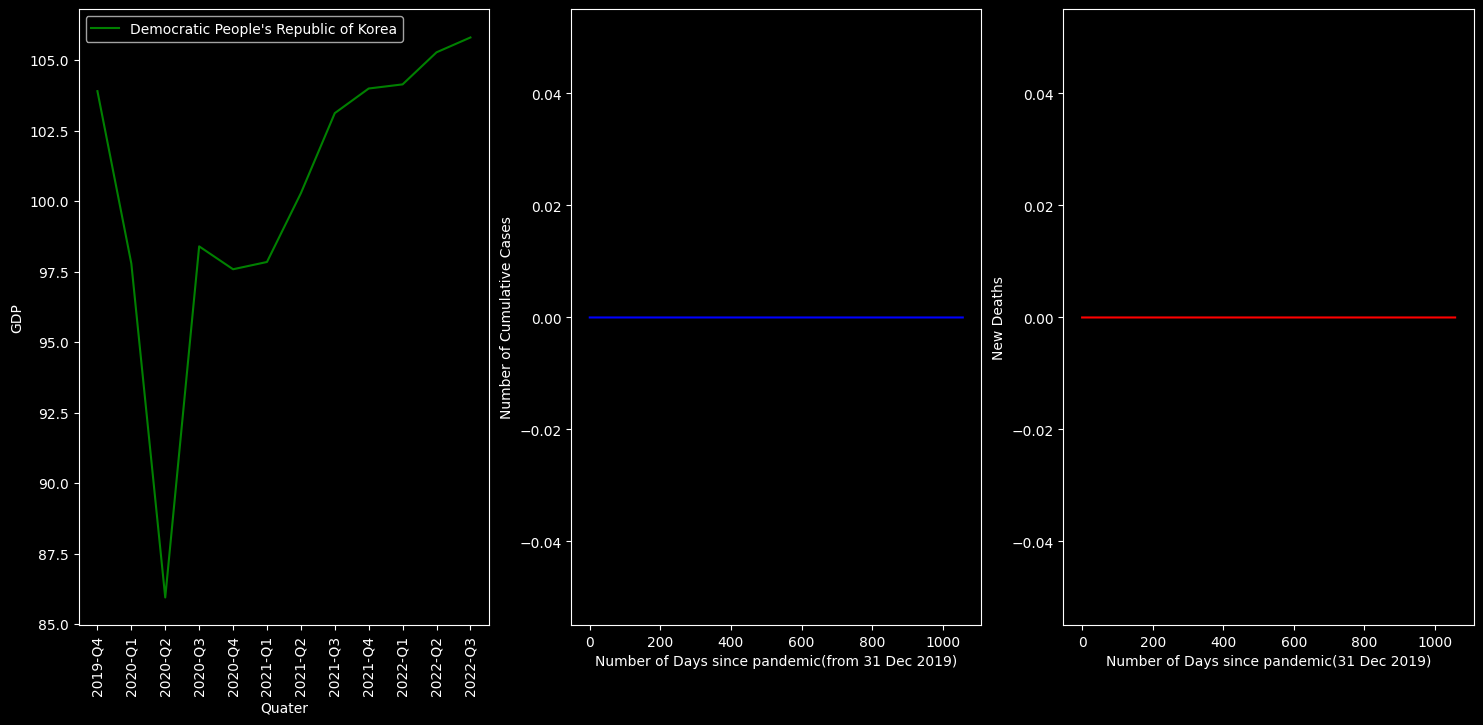

In [916]:
#Same loops as the previous dataframe just put the input countries as you wish.
num = int(input("Enter number of countries of interest: "))
con_list=[]
con_code=[]
for i in range(num):
    con_list.append(input("Enter Country(eg. India,Japan): "))
    con_code.append(input("Enter Country Code(eg. India code is IND,Japan code is JPN): "))
print(con_code)
imp_con=pd.DataFrame()
for countries in con_list:
    country =  covid_data.loc[covid_data['Country'] == countries]
    imp_con = pd.concat([imp_con , country])
imp_con
Qterly_gdp=pd.DataFrame()
con_code=['ITA','USA','IND','GBR','RUS','BRA','JPN']
for countries in con_code:
    country = gdp_covid_data.loc[gdp_covid_data['LOCATION'] == countries]
    Qterly_gdp = pd.concat([Qterly_gdp , country])
Qterly_gdp_2019=pd.DataFrame()
time=['2019-Q4','2020-Q1','2020-Q2','2020-Q3','2020-Q4','2021-Q1','2021-Q2','2021-Q3','2021-Q4','2022-Q1','2022-Q2','2022-Q3']
for t in time:
    country = Qterly_gdp.loc[Qterly_gdp['TIME'] == t]
    Qterly_gdp_2019 = pd.concat([Qterly_gdp_2019 , country])
Qterly_gdp_IDX=pd.DataFrame()
country = Qterly_gdp_2019.loc[Qterly_gdp_2019['MEASURE'] == 'IDX']
Qterly_gdp_IDX = pd.concat([Qterly_gdp_IDX , country])
Qterly_gdp_2019=Qterly_gdp_IDX
for i in range(len(con_list)):
    covid_con=pd.DataFrame()
    c=imp_con.loc[imp_con['Country']==con_list[i]]
    covid_con=pd.concat([covid_con,c])
    Qterly_gdp_con=pd.DataFrame()
    country = Qterly_gdp_IDX.loc[Qterly_gdp_IDX['LOCATION'] == con_code[i]]
    Qterly_gdp_con = pd.concat([Qterly_gdp_con , country])
    x=Qterly_gdp_con.iloc[:,5]
    y=Qterly_gdp_con.iloc[:,6]
    x1=covid_con.iloc[:,5]
    x2=covid_con.iloc[:,6]
    fig, ax = plt.subplots(1, 3, figsize=(18,8))
    plt.subplot(1,3,1)
    plt.plot(x,y,label=con_list[i],color='g')
    plt.legend()
    plt.xlabel('Quater')
    plt.ylabel('GDP')
    plt.xticks(rotation=90)
    plt.subplot(1,3,2)
    plt.plot(y2,x1,color='b')
    plt.xlabel('Number of Days since pandemic(from 31 Dec 2019)')
    plt.ylabel('Number of Cumulative Cases')
    plt.subplot(1,3,3)
    plt.plot(y2,x2,color='r')
    plt.xlabel('Number of Days since pandemic(31 Dec 2019)')
    plt.ylabel('New Deaths')
    plt.show()